In [ ]:
pip install tensorflow


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Divide the dataset into dependent and independent features

X=dataset.iloc[:,3:13]
Y=dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
Y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
#Feature Engineering: is the process of preparing and transforming raw data into meaningful features that help machine learning models learn patterns and make accurate predictions.
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

#get_dummies: is a function in pandas used for One-Hot Encoding — it converts categorical variables into binary (0/1) columns, so that machine learning models can understand them.


In [ ]:
#Concatenate these variables with dataframe
X=X.drop(['Geography','Gender'], axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [ ]:
#Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
#Data has got transformed
X_train, X_test

(array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
          1.74309049, -1.09168714],
        [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
         -0.57369368,  0.91601335],
        [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
         -0.57369368, -1.09168714],
        ...,
        [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
         -0.57369368,  0.91601335],
        [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
          1.74309049, -1.09168714],
        [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
         -0.57369368, -1.09168714]]),
 array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
         -0.57369368, -1.09168714],
        [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
         -0.57369368, -1.09168714],
        [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
          1.74309049, -1.09168714],
        ...,
        [-0.74791227, -0.27319958, -1.37744033, ..., -

In [ ]:
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU, PReLU, LeakyReLU, ELU
from tensorflow.keras.layers import Dropout


In [ ]:
#Let's initialise the ANN
classifier=Sequential()

In [ ]:
#Add the input layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
#Add hidden first layer
classifier.add(Dense(units=7,activation='relu'))

In [ ]:
#Add second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [ ]:
#Add the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
#By deafault adam uses learning rate as 0.1

In [ ]:
 model_history=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7893 - loss: 0.4974 - val_accuracy: 0.7955 - val_loss: 0.4301
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8160 - loss: 0.4039 - val_accuracy: 0.8395 - val_loss: 0.3857
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8569 - loss: 0.3454 - val_accuracy: 0.8523 - val_loss: 0.3717
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8579 - loss: 0.3399 - val_accuracy: 0.8395 - val_loss: 0.3813
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8648 - loss: 0.3353 - val_accuracy: 0.8538 - val_loss: 0.3589
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8680 - loss: 0.3283 - val_accuracy: 0.8546 - val_loss: 0.3589
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8660 - loss: 0.3281 - val_accuracy: 0.8466 - val_loss: 0.3751
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8605 - loss: 0.3446 - val_accu

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

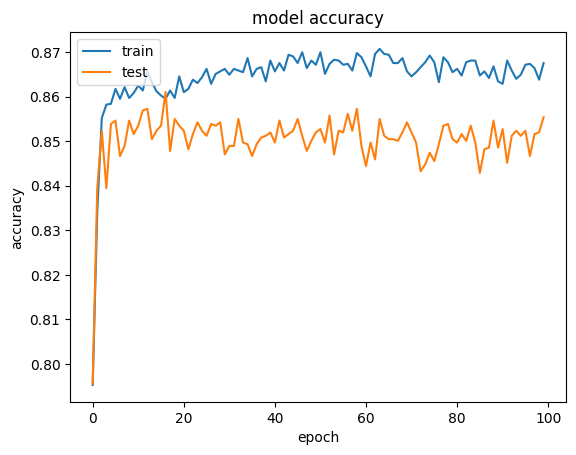

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Making the prediction and evaluate the model
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
#Make the confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,y_pred)
cm

array([[1528,   67],
       [ 208,  197]])

In [ ]:
#Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test,y_pred)
score

0.8625

In [ ]:
#Get the weights
classifier.get_weights()

[array([[-3.7107259e-02,  4.6055400e-01,  1.1211565e+00, -4.4713446e-01,
          1.7378941e-01, -1.5693443e+00, -2.1997832e-01, -1.9590998e-01,
         -6.3079393e-01, -1.9076170e-01, -6.6859382e-01],
        [-3.5602698e+00, -2.1883225e+00, -3.7127686e+00,  2.3619549e+00,
         -4.4482303e+00,  4.7073463e-01, -3.0307643e+00, -1.9740446e+00,
         -3.2426560e+00, -4.9201736e-01, -4.8152795e+00],
        [ 5.1499563e-01,  7.2559530e-01, -1.3795544e+00, -2.2124912e-01,
         -5.0131065e-01, -1.8749659e+00, -7.4559319e-01, -6.1867809e-01,
          2.7243607e+00, -6.8780696e-01, -6.5951282e-01],
        [ 1.6632587e+00, -4.2217946e+00, -1.1609857e+00, -6.8013400e-01,
          1.9434839e+00, -8.2069135e-01, -4.3726339e+00, -1.0625243e+00,
          1.4124259e+00,  1.2422693e+00, -1.5481940e-01],
        [-6.2791854e-01, -1.0849095e-03, -7.1060377e-01, -9.1631722e-01,
          1.3120069e-01, -1.9104215e+00,  1.3593957e+00, -7.0111036e+00,
          1.9421989e+00,  5.3677773e+0